# Weeks 9 & 10 Consolidated Exercises

### Keiuntae Smith
### 11 May 2022 
### DSC 540 Data Preparation 

## Activity 9: Extracting the Top 100 eBooks from Gutenberg

In [1]:
# Import necessary libraries including regex, and beautifulsoup
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import json
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# check SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
top100url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(top100url)

In [4]:
# Write a small function to check the status of web request
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1
    
status_check(response)

Success!


1

In [5]:
# Decode the response and pass on to `BeautifulSoup` for HTML parsing
contents = response.content.decode(response.encoding)

soup = BeautifulSoup(contents, 'html.parser')

In [6]:
# Find all the _href_ tags and store them in the list of links. Check how the list looks like - print first 30 elements
# Empty list to hold all the http links in the HTML page
lst_links=[]

# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    print(link.get('href'))
    lst_links.append(link.get('href'))

/
/about/
/about/
/policy/collection_development.html
/about/contact_information.html
/about/background/
/policy/permission.html
/policy/privacy_policy.html
/policy/terms_of_use.html
/ebooks/
/ebooks/
/ebooks/bookshelf/
/browse/scores/top
/ebooks/offline_catalogs.html
/help/
/help/
/help/copyright.html
/help/errata.html
/help/file_formats.html
/help/faq.html
/policy/
/help/public_domain_ebook_submission.html
/help/submitting_your_own_work.html
/help/mobile.html
/attic/
/donate/
/donate/
#books-last1
#authors-last1
#books-last7
#authors-last7
#books-last30
#authors-last30
/ebooks/1342
/ebooks/84
/ebooks/11
/ebooks/1661
/ebooks/2701
/ebooks/1952
/ebooks/20228
/ebooks/64317
/ebooks/4300
/ebooks/68215
/ebooks/345
/ebooks/174
/ebooks/98
/ebooks/2542
/ebooks/43
/ebooks/1400
/ebooks/32449
/ebooks/2600
/ebooks/68217
/ebooks/844
/ebooks/1080
/ebooks/1260
/ebooks/219
/ebooks/1184
/ebooks/5200
/ebooks/2591
/ebooks/47629
/ebooks/6130
/ebooks/2554
/ebooks/55
/ebooks/25344
/ebooks/120
/ebooks/996
/e

In [7]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [8]:
booknum=[]

In [9]:
for i in range(15,69):
    link=lst_links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        booknum.append(int(n[0]))

In [10]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1342, 84, 11, 1661, 2701, 1952, 20228, 64317, 4300, 68215, 345, 174, 98, 2542, 43, 1400, 32449, 2600, 68217, 844, 1080, 1260, 219, 1184, 5200, 2591, 47629, 6130, 2554, 55, 25344, 120, 996, 68214, 2814, 5740]


In [11]:
print(soup.text[:3000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-06-01143396
last 7 days1002445
last 30 days4598986



Top 100 EBooks yesterd

In [12]:
# Temp empty list of Ebook names
lst_titles_temp=[]

In [13]:
# Use `splitlines()` method of the `soup.text`. It splits the lines of the text of the `soup` object.
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [14]:
# Loop 1-100 to add the strings of next 100 lines to this temporary list. 
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [15]:
# Use `match` and `span` to find indices and use them
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [16]:
# print the list of titles
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Pride and Prejudice by Jane Austen 
Frankenstein
Alice
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Moby Dick
The Yellow Wallpaper by Charlotte Perkins Gilman 
Noli Me Tangere by Jos
The Great Gatsby by F
Ulysses by James Joyce 
The answer by George O
Dracula by Bram Stoker 
The Picture of Dorian Gray by Oscar Wilde 
A Tale of Two Cities by Charles Dickens 
A Doll
The Strange Case of Dr
Great Expectations by Charles Dickens 
Japanese Girls and Women by Alice Mabel Bacon 
War and Peace by graf Leo Tolstoy 
Friendly counsels for freedmen by Jared Bell Waterbury 
The Importance of Being Earnest
A Modest Proposal by Jonathan Swift 
Jane Eyre
Heart of Darkness by Joseph Conrad 
The Count of Monte Cristo
Metamorphosis by Franz Kafka 
Grimms
Ang 
The Iliad by Homer 
Crime and Punishment by Fyodor Dostoyevsky 
The Wonderful Wizard of Oz by L
The Scarlet Letter by Nathaniel Hawthorne 
Treasure Island by Robert Louis Stevenson 
Don Quixote by Miguel de Cer

## Exercise 2: Activity 10 Building Your Own Movie Database by Reading an API

In [17]:
# import libraries 
import urllib.request, urllib.parse, urllib.error
import json
from PIL import Image

In [18]:
# Load the secret API key from a JSON file and store in the same folder into a variable
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [19]:
# Assign the portal to a variable
base_url = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [20]:
# Write a utility function `print_json` to print nicely the movie data from a JSON file (which we will get from the portal)
# Here are the keys of a JSON file,
#'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language','Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID'

# Define the print_json function
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID','Poster']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [21]:
# Define the saved_poster function
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
   
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [22]:
# Define the find_movie function
def find_movie(title):
    try:
        url = base_url + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [23]:
# Search for 'Titanic' movie
find_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=d4147f6a
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,136,141
imdbID: tt0120338
Poster: https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg
----------------------------------

#Display Image
%%html
<img src= 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg'>

In [24]:
# Search for 'The Godfather' movie
find_movie("The Godfather")

Retrieving the data of "The Godfather" now... 
http://www.omdbapi.com/?t=The+Godfather&apikey=d4147f6a
--------------------------------------------------
Title: The Godfather
Year: 1972
Rated: R
Released: 24 Mar 1972
Runtime: 175 min
Genre: Crime, Drama
Director: Francis Ford Coppola
Writer: Mario Puzo, Francis Ford Coppola
Actors: Marlon Brando, Al Pacino, James Caan
Plot: The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.
Language: English, Italian, Latin
Country: United States
Awards: Won 3 Oscars. 31 wins & 30 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '9.2/10'}, {'Source': 'Rotten Tomatoes', 'Value': '97%'}, {'Source': 'Metacritic', 'Value': '100/100'}]
Metascore: 100
imdbRating: 9.2
imdbVotes: 1,786,257
imdbID: tt0068646
Poster: https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX3

#Display Image
%%html
<img src= 'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_SX300.jpg'>

In [25]:
# Search for Random_error to generate 'Movie not found!' error

find_movie('random error')

Retrieving the data of "random error" now... 
http://www.omdbapi.com/?t=random+error&apikey=d4147f6a
Error encountered:  Movie not found!


## Exercise 3: Twitter Data Pull 

In [26]:
#install the python-twitter library
!pip install python-twitter 

In [27]:
#import the twitter library
import twitter

In [28]:
#enter twitter app developer credentials (keys and tokens)
api = twitter.Api(consumer_key='6JuSUoQ5oq3Rirmkq1ZegvFap',
  consumer_secret='56eizOVIgWY78CugPyzr9NcbatITnkSLbKW8Ze5ibueJkCw0eF',
    access_token_key='1526568329036562434-5AruRnaSavA5M6Yfoq9tR2kNk11tCX',
    access_token_secret='43G4vZnrTSLzBxkxOUYvT2eJMMM4DEYzo2dP5jyZds3z8')

In [29]:
# Display the API credentials 
print(api.VerifyCredentials())

{"created_at": "Tue May 17 14:20:44 +0000 2022", "default_profile": true, "default_profile_image": true, "friends_count": 2, "id": 1526568329036562434, "id_str": "1526568329036562434", "name": "keiuntae", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "keiuntae2", "withheld_in_countries": []}


In [30]:
#display data searching for "Bellevue University"
api.GetSearch(term='Bellevue University', since=2022-5-1, count=10)

[Status(ID=1532547813216854020, ScreenName=JoslynJunior, Created=Fri Jun 03 02:20:46 +0000 2022, Text='Thank you to Green Bellevue for inviting me to speak at Bellevue University. Buddy Bison was on the podium during m… https://t.co/I1ycsTYbK7'),
 Status(ID=1532392883621347328, ScreenName=JournalHardin, Created=Thu Jun 02 16:05:08 +0000 2022, Text="Plattsmouth graduate Madison Nelson was named Co-Female Athlete of the Year at Wednesday night's Bellevue Universit… https://t.co/BmrS7vumDh"),
 Status(ID=1532375172895891456, ScreenName=DoaneSoftball, Created=Thu Jun 02 14:54:46 +0000 2022, Text='RT @nefury00: The list is growing and not many spots left. University of Sioux Falls, Northern State, Southwest Minnesota State, Midland, B…'),
 Status(ID=1532361912872325121, ScreenName=SarpyCountyGov, Created=Thu Jun 02 14:02:04 +0000 2022, Text='Mark your calendars! Find your next career at Sarpy County Hiring Day on June 8!\n\nJoin us anytime between 10 a.m.-7… https://t.co/4OAQkI0nmD'),
 Statu

In [31]:
#display data searching for "Data Science"
api.GetSearch(term='Data Science', since=2022-5-1, count=10)

[Status(ID=1532019559162695680, ScreenName=Dr_ThomasZ, Created=Wed Jun 01 15:21:41 +0000 2022, Text='It’s the moment you’ve all been waiting for…\nAfter a six-month process of aligning Webb’s mirror and preparing its… https://t.co/nR4eLbRSXx'),
 Status(ID=1532362596946411524, ScreenName=KamVTV, Created=Thu Jun 02 14:04:47 +0000 2022, Text='A new study finds microplastics from masks were in peoples lungs and in the stool of unborn babies. Meanwhile, Bide… https://t.co/DzVcz1kh6g'),
 Status(ID=1532026496671432704, ScreenName=newsmax, Created=Wed Jun 01 15:49:15 +0000 2022, Text='Dr. Deborah Birx: "Sometimes, we use mandates because we don\'t want to take the time to explain the science and the… https://t.co/wcWeaeu1FA'),
 Status(ID=1532550992029536256, ScreenName=KateCox59582715, Created=Fri Jun 03 02:33:24 +0000 2022, Text='RT @MarkChangizi: “Scientific Consensus” isn’t science\n\nI have a bunch of discoveries I’m known for, but even to this day I have no idea if…'),
 Status(ID=15325509

In [32]:
#display data searching for "NBA Playoffs"
api.GetSearch(term='NBA Finals', since=2022-5-1, count=10)

[Status(ID=1532182202032726019, ScreenName=ESPNNBA, Created=Thu Jun 02 02:07:58 +0000 2022, Text='Derrick White had ZERO D-I scholarship offers out of HS.\n\n▪Went from scout team to All-American at the D-II level… https://t.co/Erelb45HsQ'),
 Status(ID=1532361392405237762, ScreenName=espn, Created=Thu Jun 02 14:00:00 +0000 2022, Text='THE NBA FINALS ARE HERE 🙌 \n\n#NBAFinals https://t.co/hHzpIl8FlS'),
 Status(ID=1532382149592002560, ScreenName=ShamsCharania, Created=Thu Jun 02 15:22:29 +0000 2022, Text='Golden State Warriors guard Gary Payton II is on track to dress and be available for Game 1 of the NBA Finals vs. B… https://t.co/ug2tgiOm5j'),
 Status(ID=1532551213094346752, ScreenName=TheRealML3, Created=Fri Jun 03 02:34:17 +0000 2022, Text='RT @DameDeadAF: Andrew Wiggins welcome to the nba finals'),
 Status(ID=1532551209050963968, ScreenName=SirEHesse, Created=Fri Jun 03 02:34:16 +0000 2022, Text='RT @VarskySports: Los 21 pts de Curry en el 1º cuarto son la mejor marca en un cuarto 

## Exercise 4: Data Visualization

In [33]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load dataset
sales_df = pd.read_csv('sales_record.csv')
sales_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/13,957081544,1/11/14,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/10,301644504,7/26/10,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/11,478051030,9/29/11,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/10,892599952,6/15/10,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/15,571902596,7/27/15,7542,152.58,97.44,1150758.36,734892.48,415865.88


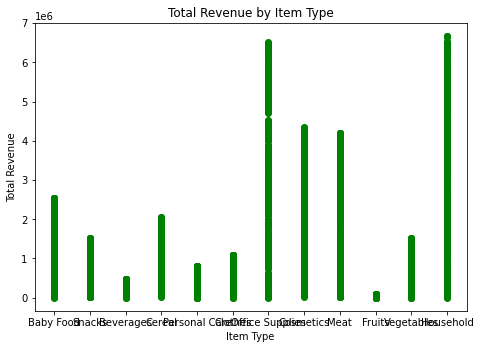

In [35]:
# Create a scatter plot of Total Revenue by Item Type
fig=plt.figure(15)
ax=fig.add_axes([0, 0, 1, 1])
ax.scatter(sales_df['Item Type'], sales_df['Total Revenue'], color='g')
ax.set_xlabel('Item Type')
ax.set_ylabel('Total Revenue')
ax.set_title('Total Revenue by Item Type')
plt.show()

<AxesSubplot:xlabel='Region', ylabel='Total Cost'>

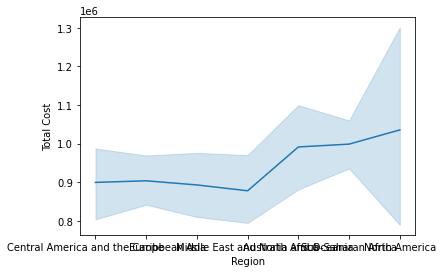

In [36]:
## line chart
sns.lineplot(data=sales_df, x="Region", y="Total Cost")

<AxesSubplot:xlabel='Region', ylabel='Total Revenue'>

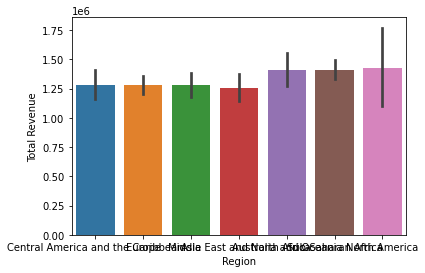

In [37]:
## bar chart
sns.barplot(x="Region", y="Total Revenue", data=sales_df)

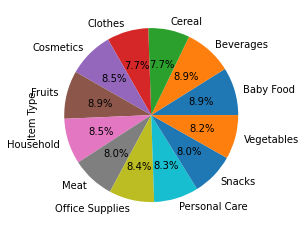

In [38]:
## pie chart
data = sales_df.groupby("Item Type")["Item Type"].count()
data.plot.pie(autopct="%.1f%%");